In [2]:
import pandas as pd
import re
import numpy as np

In [3]:
df = pd.read_csv("scraped_data.csv")

In [4]:
df.head()

,url,ad_id,Type,Title,location,Price,Land_Size,Buildup(Sqr.Ft.),Floor,Living_Room,Bedroom,Bathroom,Kitchen,Furnishing,Road_Type,Road_Size
0,https://hamrobazaar.com/for-sale-house/House-O...,HB-7457D7,House - Individual,"House On Sale at Samakhusi, Town Planning","Tilintar, बसुन्धरा चौकी, Kathmandu-03, काठमाडौ...","रू. 3,99,00,000",5,1500,3,2,7,3,2,NaN,Pitched,2
1,https://hamrobazaar.com/for-sale-house/New-Hou...,HB-97D0D9,House - Individual,"New House On Sale at Samakhusi, Near Chowk","Tilintar, बसुन्धरा चौकी, Kathmandu-03, काठमाडौ...","रू. 5,50,00,000",6,1800,4,3,8,4,3,NaN,Pitched,3
2,https://hamrobazaar.com/for-sale-house/House-o...,HB-060059,HouseIndividual,House on Sale -Imadol sethi Pakha,"Imadol (Mahalaxmi), Lalitpur","रू. 3,50,00,000",3.5 Anna,00,3.5,2,7,4,2,NaN,Gravel,2
3,https://hamrobazaar.com/for-sale-house/Commerc...,HB-AE6A9E,NaN,Commercial Building For Sale at Samakhusi,"Tilintar, बसुन्धरा चौकी, Kathmandu-03, काठमाडौ...","रू. 16,00,00,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://hamrobazaar.com/for-sale-house/Brand-N...,HB-5A7384,House - Individual,"Brand New House On Sale at Tokha, Dhaneshwor","टोखा चण्डेश्वरि, Tokha-02, टोखा नगरपालिका, काठ...","रू. 1,60,00,000",4,1200,1,1,2,1,1,NaN,Pitched,1


## Handeling Null values

In [5]:
df.isnull().sum

<bound method DataFrame.sum of         url  ad_id   Type  Title  location  Price  Land_Size  \
0     False  False  False  False     False  False      False   
1     False  False  False  False     False  False      False   
2     False  False  False  False     False  False      False   
3     False  False   True  False     False  False       True   
4     False  False  False  False     False  False      False   
...     ...    ...    ...    ...       ...    ...        ...   
2225  False  False  False  False     False  False      False   
2226  False  False  False  False     False  False      False   
2227  False  False  False  False     False  False      False   
2228  False  False  False  False     False  False      False   
2229  False  False  False  False     False  False      False   

      Buildup(Sqr.Ft.)  Floor  Living_Room  Bedroom  Bathroom  Kitchen  \
0                False  False        False    False     False    False   
1                False  False        False    False 

In [6]:
columns_to_check = ["Land_Size"]
df = df.dropna(subset=columns_to_check)

In [7]:
df.head()

,url,ad_id,Type,Title,location,Price,Land_Size,Buildup(Sqr.Ft.),Floor,Living_Room,Bedroom,Bathroom,Kitchen,Furnishing,Road_Type,Road_Size
0,https://hamrobazaar.com/for-sale-house/House-O...,HB-7457D7,House - Individual,"House On Sale at Samakhusi, Town Planning","Tilintar, बसुन्धरा चौकी, Kathmandu-03, काठमाडौ...","रू. 3,99,00,000",5,1500,3,2,7,3,2,NaN,Pitched,2
1,https://hamrobazaar.com/for-sale-house/New-Hou...,HB-97D0D9,House - Individual,"New House On Sale at Samakhusi, Near Chowk","Tilintar, बसुन्धरा चौकी, Kathmandu-03, काठमाडौ...","रू. 5,50,00,000",6,1800,4,3,8,4,3,NaN,Pitched,3
2,https://hamrobazaar.com/for-sale-house/House-o...,HB-060059,HouseIndividual,House on Sale -Imadol sethi Pakha,"Imadol (Mahalaxmi), Lalitpur","रू. 3,50,00,000",3.5 Anna,00,3.5,2,7,4,2,NaN,Gravel,2
4,https://hamrobazaar.com/for-sale-house/Brand-N...,HB-5A7384,House - Individual,"Brand New House On Sale at Tokha, Dhaneshwor","टोखा चण्डेश्वरि, Tokha-02, टोखा नगरपालिका, काठ...","रू. 1,60,00,000",4,1200,1,1,2,1,1,NaN,Pitched,1
5,https://hamrobazaar.com/for-sale-house/House-F...,HB-B27929,House - Individual,"House For Sale at Samakhusi, Near Chowk","Tilintar, बसुन्धरा चौकी, Kathmandu-03, काठमाडौ...","रू. 2,80,00,000",4,1500,1,2,6,3,2,NaN,Pitched,2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2114 entries, 0 to 2229
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   url               2114 non-null   object 
 1   ad_id             2113 non-null   object 
 2   Type              2113 non-null   object 
 3   Title             2113 non-null   object 
 4   location          2114 non-null   object 
 5   Price             2104 non-null   object 
 6   Land_Size         2114 non-null   object 
 7   Buildup(Sqr.Ft.)  2114 non-null   object 
 8   Floor             2114 non-null   object 
 9   Living_Room       2114 non-null   object 
 10  Bedroom           2114 non-null   object 
 11  Bathroom          2114 non-null   object 
 12  Kitchen           2114 non-null   object 
 13  Furnishing        0 non-null      float64
 14  Road_Type         2114 non-null   object 
 15  Road_Size         2114 non-null   object 
dtypes: float64(1), object(15)
memory usage: 280.8+ 

In [9]:
df1 = df.drop(columns=['url', 'Furnishing'])

In [10]:
df1.shape

(2114, 14)

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2114 entries, 0 to 2229
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ad_id             2113 non-null   object
 1   Type              2113 non-null   object
 2   Title             2113 non-null   object
 3   location          2114 non-null   object
 4   Price             2104 non-null   object
 5   Land_Size         2114 non-null   object
 6   Buildup(Sqr.Ft.)  2114 non-null   object
 7   Floor             2114 non-null   object
 8   Living_Room       2114 non-null   object
 9   Bedroom           2114 non-null   object
 10  Bathroom          2114 non-null   object
 11  Kitchen           2114 non-null   object
 12  Road_Type         2114 non-null   object
 13  Road_Size         2114 non-null   object
dtypes: object(14)
memory usage: 247.7+ KB


## Removing Devnagari Text

In [12]:
# Function to remove Nepali text, numbers, and any non-alphabetical characters
def clean_text(text):
    # Regular expression to remove everything except English alphabets (A-Z, a-z)
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text)
    return cleaned_text

# Apply the function to the specific column
df1['location'] = df1['location'].apply(clean_text)

In [13]:
df1.head()

,ad_id,Type,Title,location,Price,Land_Size,Buildup(Sqr.Ft.),Floor,Living_Room,Bedroom,Bathroom,Kitchen,Road_Type,Road_Size
0,HB-7457D7,House - Individual,"House On Sale at Samakhusi, Town Planning",Tilintar Kathmandu,"रू. 3,99,00,000",5,1500,3,2,7,3,2,Pitched,2
1,HB-97D0D9,House - Individual,"New House On Sale at Samakhusi, Near Chowk",Tilintar Kathmandu,"रू. 5,50,00,000",6,1800,4,3,8,4,3,Pitched,3
2,HB-060059,HouseIndividual,House on Sale -Imadol sethi Pakha,Imadol Mahalaxmi Lalitpur,"रू. 3,50,00,000",3.5 Anna,00,3.5,2,7,4,2,Gravel,2
4,HB-5A7384,House - Individual,"Brand New House On Sale at Tokha, Dhaneshwor",Tokha,"रू. 1,60,00,000",4,1200,1,1,2,1,1,Pitched,1
5,HB-B27929,House - Individual,"House For Sale at Samakhusi, Near Chowk",Tilintar Kathmandu,"रू. 2,80,00,000",4,1500,1,2,6,3,2,Pitched,2


In [14]:
occurrences = df1['location'].value_counts()
occurrences

location
Budhanilkantha                            231
Budhanilkantha                            216
    Aakashedhara Budhanilkantha            72
NH   Tokha                                 69
budanilkantha Budhanilkantha Kathmandu     68
                                         ... 
 Dhapasi Marg     Kathmandu                 7
  Tokha                                     5
DR Ratnanagar Ratnanagar                    5
Champi Karyabinayak Lalitpur                3
naya bazar NayaBazar Kathmandu              2
Name: count, Length: 94, dtype: int64

In [15]:
occurrences_df = occurrences.reset_index()
occurrences_df.columns = ['Entry', 'Count']
occurrences_df.to_excel('occurrences.xlsx', index=False)

## Drop all data outside Kathmandu

In [16]:
keywords = ['Pyuthan Pyuthan', '   Pokhara Pokhara     ', 'Biratnagar Other Area Morang Biratnagar', 'DR Ratnanagar Ratnanagar     ', 'Janakpur']
df_filtered = df1[~df1['location'].str.contains('|'.join(keywords), case=False, na=False)]

In [17]:
df_filtered

,ad_id,Type,Title,location,Price,Land_Size,Buildup(Sqr.Ft.),Floor,Living_Room,Bedroom,Bathroom,Kitchen,Road_Type,Road_Size
0,HB-7457D7,House - Individual,"House On Sale at Samakhusi, Town Planning",Tilintar Kathmandu,"रू. 3,99,00,000",5,1500,3,2,7,3,2,Pitched,2
1,HB-97D0D9,House - Individual,"New House On Sale at Samakhusi, Near Chowk",Tilintar Kathmandu,"रू. 5,50,00,000",6,1800,4,3,8,4,3,Pitched,3
2,HB-060059,HouseIndividual,House on Sale -Imadol sethi Pakha,Imadol Mahalaxmi Lalitpur,"रू. 3,50,00,000",3.5 Anna,00,3.5,2,7,4,2,Gravel,2
4,HB-5A7384,House - Individual,"Brand New House On Sale at Tokha, Dhaneshwor",Tokha,"रू. 1,60,00,000",4,1200,1,1,2,1,1,Pitched,1
5,HB-B27929,House - Individual,"House For Sale at Samakhusi, Near Chowk",Tilintar Kathmandu,"रू. 2,80,00,000",4,1500,1,2,6,3,2,Pitched,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2224,HB-A7E86B,Almost 7 years,Sell house,Budhanilkantha,"रू. 3,30,00,000",4,7,House,Paper factory,2,HouseIndividual,5 aana,Semi bungalow,5 aana
2226,HB-C7C729,HouseInColony,5 aama colony house on sale,Ramkot Syuchatar Nagarjun Raniban Sitapaila Ar...,"रू. 2,70,00,000",5,2200,3,1,4,3,1,Pitched,1
2227,HB-FFCABF,HouseSemiCommercial,ललितपुर छम्पी हाइट मा एक तले घर बिक्रीमा,Champi Karyabinayak Lalitpur,"रू. 1,60,00,000",5.3.1,700,1,1,", 1",1,1,Pitched,1
2228,HB-F38CCA,Few time,Balaju Naya Bazar ko Ghar bikri ma offer offer,naya bazar NayaBazar Kathmandu,"रू. 2,40,00,000",2,7,All good,Nayabazar,1,HouseSemiCommercial,3 Aana,2.5,3 Aana


In [18]:
# Define a function to remove all types of leading and trailing white spaces
def remove_whitespace(text):
    if isinstance(text, str):
        # Strip standard spaces and other whitespace characters using regex
        return re.sub(r'^\s+|\s+$', '', text)
    return text

df_filtered['location'] = df_filtered['location'].apply(remove_whitespace)

/var/folders/cm/q9rqvyz56z119bgylhgndv9h0000gn/T/ipykernel_1301/2503484445.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['location'] = df_filtered['location'].apply(remove_whitespace)


In [19]:
occurrences1= df_filtered['location'].value_counts()
occurrences1

location
Budhanilkantha                               542
Kathmandu                                     87
Aakashedhara Budhanilkantha                   83
Tarakeshwar                                   79
NH   Tokha                                    69
                                            ... 
Chasundol  Chyasundol Marg Budhanilkantha      9
Dhapasi Marg     Kathmandu                     7
Tokha                                          5
Champi Karyabinayak Lalitpur                   3
naya bazar NayaBazar Kathmandu                 2
Name: count, Length: 77, dtype: int64

In [20]:
occurrences_df = occurrences1.reset_index()
occurrences_df.columns = ['Entry', 'Count']
occurrences_df.to_excel('occurrences_1.xlsx', index=False)

## To remove रू. symbol and convert the price to numeric value

In [21]:
df_filtered['Price'] = df_filtered['Price'].replace({'रू.': ''}, regex=True)
df_filtered.head()

/var/folders/cm/q9rqvyz56z119bgylhgndv9h0000gn/T/ipykernel_1301/1736603504.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Price'] = df_filtered['Price'].replace({'रू.': ''}, regex=True)


,ad_id,Type,Title,location,Price,Land_Size,Buildup(Sqr.Ft.),Floor,Living_Room,Bedroom,Bathroom,Kitchen,Road_Type,Road_Size
0,HB-7457D7,House - Individual,"House On Sale at Samakhusi, Town Planning",Tilintar Kathmandu,"3,99,00,000",5,1500,3,2,7,3,2,Pitched,2
1,HB-97D0D9,House - Individual,"New House On Sale at Samakhusi, Near Chowk",Tilintar Kathmandu,"5,50,00,000",6,1800,4,3,8,4,3,Pitched,3
2,HB-060059,HouseIndividual,House on Sale -Imadol sethi Pakha,Imadol Mahalaxmi Lalitpur,"3,50,00,000",3.5 Anna,00,3.5,2,7,4,2,Gravel,2
4,HB-5A7384,House - Individual,"Brand New House On Sale at Tokha, Dhaneshwor",Tokha,"1,60,00,000",4,1200,1,1,2,1,1,Pitched,1
5,HB-B27929,House - Individual,"House For Sale at Samakhusi, Near Chowk",Tilintar Kathmandu,"2,80,00,000",4,1500,1,2,6,3,2,Pitched,2


In [22]:
# Remove any commas from the Price column
df_filtered['Price'] = df_filtered['Price'].str.replace(',', '', regex=False)

# Convert the cleaned Price column to a numeric type
df_filtered['Price'] = pd.to_numeric(df_filtered['Price'], errors='coerce')

/var/folders/cm/q9rqvyz56z119bgylhgndv9h0000gn/T/ipykernel_1301/1843751443.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Price'] = df_filtered['Price'].str.replace(',', '', regex=False)
/var/folders/cm/q9rqvyz56z119bgylhgndv9h0000gn/T/ipykernel_1301/1843751443.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Price'] = pd.to_numeric(df_filtered['Price'], errors='coerce')


In [23]:
df_filtered.head()

,ad_id,Type,Title,location,Price,Land_Size,Buildup(Sqr.Ft.),Floor,Living_Room,Bedroom,Bathroom,Kitchen,Road_Type,Road_Size
0,HB-7457D7,House - Individual,"House On Sale at Samakhusi, Town Planning",Tilintar Kathmandu,39900000.0,5,1500,3,2,7,3,2,Pitched,2
1,HB-97D0D9,House - Individual,"New House On Sale at Samakhusi, Near Chowk",Tilintar Kathmandu,55000000.0,6,1800,4,3,8,4,3,Pitched,3
2,HB-060059,HouseIndividual,House on Sale -Imadol sethi Pakha,Imadol Mahalaxmi Lalitpur,35000000.0,3.5 Anna,00,3.5,2,7,4,2,Gravel,2
4,HB-5A7384,House - Individual,"Brand New House On Sale at Tokha, Dhaneshwor",Tokha,16000000.0,4,1200,1,1,2,1,1,Pitched,1
5,HB-B27929,House - Individual,"House For Sale at Samakhusi, Near Chowk",Tilintar Kathmandu,28000000.0,4,1500,1,2,6,3,2,Pitched,2


## Initial export to xlsx to check for invalid datas

In [24]:
df_filtered.to_excel('dataframe_inital.xlsx', index=False)

## Drop rows with invalid data

In [25]:
numeric_columns = ['Buildup(Sqr.Ft.)', 'Floor', 'Living_Room', 'Bedroom', 'Bathroom', 'Kitchen']  # Replace with your actual column names

for column in numeric_columns:
    # Remove invalid entries by converting to numeric and setting errors to 'coerce'
    df_filtered[column] = pd.to_numeric(df_filtered[column], errors='coerce')
    
    # Drop rows where these columns have NaN values
    df_final= df_filtered.dropna(subset=[column])

/var/folders/cm/q9rqvyz56z119bgylhgndv9h0000gn/T/ipykernel_1301/1853025737.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[column] = pd.to_numeric(df_filtered[column], errors='coerce')
/var/folders/cm/q9rqvyz56z119bgylhgndv9h0000gn/T/ipykernel_1301/1853025737.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[column] = pd.to_numeric(df_filtered[column], errors='coerce')
/var/folders/cm/q9rqvyz56z119bgylhgndv9h0000gn/T/ipykernel_1301/1853025737.py:5: SettingWithCopyWarning: 
A va

In [26]:
df_final.head()

,ad_id,Type,Title,location,Price,Land_Size,Buildup(Sqr.Ft.),Floor,Living_Room,Bedroom,Bathroom,Kitchen,Road_Type,Road_Size
0,HB-7457D7,House - Individual,"House On Sale at Samakhusi, Town Planning",Tilintar Kathmandu,39900000.0,5,1500.0,3.0,2.0,7.0,3.0,2.0,Pitched,2
1,HB-97D0D9,House - Individual,"New House On Sale at Samakhusi, Near Chowk",Tilintar Kathmandu,55000000.0,6,1800.0,4.0,3.0,8.0,4.0,3.0,Pitched,3
2,HB-060059,HouseIndividual,House on Sale -Imadol sethi Pakha,Imadol Mahalaxmi Lalitpur,35000000.0,3.5 Anna,0.0,3.5,2.0,7.0,4.0,2.0,Gravel,2
4,HB-5A7384,House - Individual,"Brand New House On Sale at Tokha, Dhaneshwor",Tokha,16000000.0,4,1200.0,1.0,1.0,2.0,1.0,1.0,Pitched,1
5,HB-B27929,House - Individual,"House For Sale at Samakhusi, Near Chowk",Tilintar Kathmandu,28000000.0,4,1500.0,1.0,2.0,6.0,3.0,2.0,Pitched,2


In [27]:
df_final.to_excel('dataframe_final.xlsx', index=False)

## Converting Land Size to Anna

In [28]:
# Function to process the Land_Size column
def convert_land_size(size):
    size = size.lower().replace('anna', '').strip()
    
    # Handle cases like "9 & 11.5"
    if '&' in size:
        size = size.split('&')[0].strip()
    
    # Handle cases like "3 ana"
    if 'ana' in size:
        size = size.replace('ana', '').strip()
    
    # Handle cases like "3 aana"
    if 'aana' in size:
        size = size.replace('aana', '').strip()
        try:
            return float(size)
        except ValueError:
            pass
    
    # Handle cases like "4 ana 2 dam"
    match_dam = re.match(r'(\d+)\s*ana\s*(\d*)\s*dam', size, re.IGNORECASE)
    if match_dam:
        ana = int(match_dam.group(1))
        dam = int(match_dam.group(2)) if match_dam.group(2) else 0
        total_ana = ana + (dam * 0.06249)
        return round(total_ana, 4)
    
    # Handle cases like "4 AANA 3 PAISA"
    match_aana_paisa = re.match(r'(\d+)\s*(aana|anna)\s*(\d*)\s*(paisa|paisa)', size, re.IGNORECASE)
    if match_aana_paisa:
        aana = int(match_aana_paisa.group(1))
        paisa = int(match_aana_paisa.group(3)) if match_aana_paisa.group(3) else 0
        total_aana = aana + (paisa / 4.00012)
        return round(total_aana, 4)
    
    # Handle cases like "3.5aana" without spaces
    match = re.match(r'(\d*\.?\d+)\s*aana?', size)
    if match:
        return float(match.group(1))

    try:
        return float(size)
    except ValueError:
        return size  # Return the original value if conversion fails

In [29]:
df_final['Land_Size'] = df_final['Land_Size'].apply(convert_land_size)

/var/folders/cm/q9rqvyz56z119bgylhgndv9h0000gn/T/ipykernel_1301/3828467713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Land_Size'] = df_final['Land_Size'].apply(convert_land_size)


In [30]:
def convert_land_size_(land_size):
    if isinstance(land_size, str):
        match = re.match(r"(\d+)\s*a\s*(\d+)\s*paisa", land_size)
        if match:
            aana = int(match.group(1))
            paisa = int(match.group(2))
            return aana + (paisa * 0.75)
    return land_size  # Return the original value if it's not a string

In [31]:
df_final['Land_Size'] = df_final['Land_Size'].apply(convert_land_size_)

/var/folders/cm/q9rqvyz56z119bgylhgndv9h0000gn/T/ipykernel_1301/1720327472.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Land_Size'] = df_final['Land_Size'].apply(convert_land_size_)


In [32]:
def convert_land_size_3(land_size):
    if isinstance(land_size, str):
        # Handle cases like "3 a" or "3.5 a"
        match = re.match(r"(\d+\.?\d*)\s*a", land_size)
        if match:
            return float(match.group(1))
        
        # Handle cases like "4 2 dam" or "4 2daam"
        match = re.match(r"(\d+)\s*(\d+)\s*(dam|daam)", land_size)
        if match:
            aana = int(match.group(1))
            dam = int(match.group(2))
            return aana + (dam * 0.063)
        
        # Handle cases like "3 1 paisa"
        match = re.match(r"(\d+)\s*(\d+)\s*paisa", land_size)
        if match:
            aana = int(match.group(1))
            paisa = int(match.group(2))
            return aana + (paisa * 0.25)
        
        # Handle cases like "5 5 paisa"
        match = re.match(r"(\d+)\s*(\d+)\s*paisa", land_size)
        if match and int(match.group(2)) >= 4:
            aana = int(match.group(1))
            paisa = int(match.group(2))
            return aana + 1 + ((paisa - 4) * 0.25)
        
        # Handle cases like "5.3.1"
        match = re.match(r"(\d+)\.(\d)\.(\d+)", land_size)
        if match:
            aana = int(match.group(1))
            paisa = int(match.group(2))
            dam = int(match.group(3))
            return aana + (paisa * 0.25) + (dam * 0.063)
    
    # Return the value as-is if it's already a float or None
    return land_size


In [33]:
df_final['Land_Size'] = df_final['Land_Size'].apply(convert_land_size_3)

/var/folders/cm/q9rqvyz56z119bgylhgndv9h0000gn/T/ipykernel_1301/71365437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Land_Size'] = df_final['Land_Size'].apply(convert_land_size_3)


## Drop data which consists Land for sale

In [34]:
pattern = r"^Land With House"
df_final = df_final[~df_final['Title'].str.contains(pattern, flags=re.IGNORECASE, na=False)]


## Adjusting the Land Size 

In [35]:
def adjust_land_size(size):
    if size > 40 and 100 <= size < 1000:
        size_str = str(int(size)) 
        adjusted_size = float(size_str[0] + '.' + size_str[1:])
        return adjusted_size
    return size

In [36]:
df_final['Land_Size'] = df_final['Land_Size'].apply(adjust_land_size)

## Handleing Price column which contains 410 to 4100000000

In [37]:
def adjust_price(price):
    # Convert to integer and check if the price has three digits
    if 100 <= int(price) < 1000:
        return price * 100000
    return price

In [38]:
df_final['Price'] = df_final['Price'].apply(adjust_price)

## Drop Price less than 8200000

In [39]:
prices_to_drop = df_final[df_final['Price'] <= 8200000].index
df_final = df_final.drop(prices_to_drop)

In [40]:
df = df_final

In [41]:
df.to_excel('dataframe_final_land.xlsx', index=False)

## Handeling null and invalid data on Buildup(Sqr.Ft.) column

### Conversion to Square Feet from Aana

In [42]:
def convert_aana_to_sqft(aana):
    return aana * 342.25

In [43]:
# Apply the conversion to create a new column 'Land_Size_Sqft'
df['Land_Size_Sqft'] = df['Land_Size'].apply(convert_aana_to_sqft)

### Update 'Buildup(Sqr.Ft.)' based on the condition

In [44]:
# If Buildup(Sqr.Ft.) < 1800: Replace it with new_value = FAR * Land_Size_SqFt where FAR = 2.5.
# Else: Leave it unchanged.
FAR = 2.5
condition = (df['Buildup(Sqr.Ft.)'] < 1800) | (df['Buildup(Sqr.Ft.)'].isna())
new_values = FAR * df.loc[condition, 'Land_Size_Sqft']
df.loc[condition, 'Buildup(Sqr.Ft.)'] = new_values

In [45]:
df.to_excel('dataframe_converted.xlsx', index=False)

In [46]:
df['Bedroom'].unique()

array([ 7. ,  8. ,  2. ,  6. ,  9. ,  5. ,  3. ,  4. , 10. , 11. ,  nan,
        1. ,  2.5,  3.5])

### Handle null values in Bedroom and Bathroom column 

In [47]:
df.isnull().sum()

ad_id                 1
Type                  1
Title                 1
location              0
Price                 0
Land_Size             0
Buildup(Sqr.Ft.)      0
Floor               277
Living_Room         228
Bedroom              13
Bathroom            119
Kitchen               0
Road_Type             0
Road_Size             0
Land_Size_Sqft        0
dtype: int64

In [48]:
df['Bedroom'].dtype

dtype('float64')

In [49]:
df['Bathroom'].dtype

dtype('float64')

In [50]:
mode_value = df['Bedroom'].mode()[0]
mode_value_bathroom = df['Bathroom'].mode()[0]
df['Bedroom'].fillna(mode_value, inplace=True)
df['Bathroom'].fillna(mode_value_bathroom, inplace=True)

/var/folders/cm/q9rqvyz56z119bgylhgndv9h0000gn/T/ipykernel_1301/323933821.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Bedroom'].fillna(mode_value, inplace=True)
/var/folders/cm/q9rqvyz56z119bgylhgndv9h0000gn/T/ipykernel_1301/323933821.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [51]:
df.isnull().sum()

ad_id                 1
Type                  1
Title                 1
location              0
Price                 0
Land_Size             0
Buildup(Sqr.Ft.)      0
Floor               277
Living_Room         228
Bedroom               0
Bathroom              0
Kitchen               0
Road_Type             0
Road_Size             0
Land_Size_Sqft        0
dtype: int64

## Categorize location as Inside or Outside Ring Road

In [52]:
df['location'].unique()

array(['Tilintar   Kathmandu', 'Imadol Mahalaxmi Lalitpur', 'Tokha',
       'Dhapasi Marg     Kathmandu', 'Kathmandu', 'NH   Tokha',
       'chandagiri Chandragiri Kathmandu', 'Nakhipot Lalitpur',
       'New Cosmetic and Gift Shop F   Tokha', 'Budhanilkantha',
       'Aakashedhara Budhanilkantha', 'Tarakeshwar',
       'Gothatar Kageshwor Kathmandu', 'Talim Kendra Marg Lalitpur',
       'budanilkantha Budhanilkantha Kathmandu',
       'Mahendra Adarsha Higher Secondary School Imadol  Tikathali  Mahalaxmi',
       'Mahalaxmi', 'dhasi  Mahalaxmi', 'taiba Thaiba Godawari Lalitpur',
       'Narayantar Jorpati Kathmandu',
       'budanilkantha Hepali Height Budhanilkantha Kathmandu',
       'Lazimpat    Radisson Hotel Kathmandu  Kathmandu',
       'Sanepa Lalitpur', 'Lalitpur', 'Pawan Galli   Kathmandu',
       'DR Tarakeshwar', 'Chasundol  Chyasundol Marg Budhanilkantha',
       'Nepal Rastra Bank  Lalita Marg   Kathmandu',
       'Nepal Rastra Bank       Kathmandu',
       'Rudramati Cho

In [53]:
inside_ringroad_keywords = ['Kathmandu', 'Talim Kendra Marg Lalitpur', 'Lazimpat    Radisson Hotel Kathmandu  Kathmandu', 'Sanepa Lalitpur', 'Nepal Rastra Bank  Lalita Marg   Kathmandu', 'Nepal Rastra Bank       Kathmandu', 
                            'ga Hitaisi Marg   Kathmandu', 'TU Teaching Hospital Gandhari Marg    Kathmandu', 'Galkopakha Golkopakha Shorakhutte Kathmandu', 'Galkopakha Golkopakha Shorakhutte Kathmandu',
                             'Dillibazar Anamnagar Maitidevi Ghattekulo Gyaneshwar Kamalpokhari Kalikasthan Area Kathmandu', 'swayambhu Swoyambhu Kathmandu', 'Narayan Tole Maharajganj Kathmandu Kathmandu Metropolitan City Kathmandu',
                               ]
def categorize_location(location):
    if any(keyword in location for keyword in inside_ringroad_keywords):
        return 'Inside Ringroad'
    else:
        return 'Outside Ringroad'

In [54]:
df['Ring Road'] = df['location'].apply(categorize_location)

In [55]:
df.head()

,ad_id,Type,Title,location,Price,Land_Size,Buildup(Sqr.Ft.),Floor,Living_Room,Bedroom,Bathroom,Kitchen,Road_Type,Road_Size,Land_Size_Sqft,Ring Road
0,HB-7457D7,House - Individual,"House On Sale at Samakhusi, Town Planning",Tilintar Kathmandu,39900000.0,5.0,4278.1250,3.0,2.0,7.0,3.0,2.0,Pitched,2,1711.250,Inside Ringroad
1,HB-97D0D9,House - Individual,"New House On Sale at Samakhusi, Near Chowk",Tilintar Kathmandu,55000000.0,6.0,1800.0000,4.0,3.0,8.0,4.0,3.0,Pitched,3,2053.500,Inside Ringroad
2,HB-060059,HouseIndividual,House on Sale -Imadol sethi Pakha,Imadol Mahalaxmi Lalitpur,35000000.0,3.5,2994.6875,3.5,2.0,7.0,4.0,2.0,Gravel,2,1197.875,Outside Ringroad
4,HB-5A7384,House - Individual,"Brand New House On Sale at Tokha, Dhaneshwor",Tokha,16000000.0,4.0,3422.5000,1.0,1.0,2.0,1.0,1.0,Pitched,1,1369.000,Outside Ringroad
5,HB-B27929,House - Individual,"House For Sale at Samakhusi, Near Chowk",Tilintar Kathmandu,28000000.0,4.0,3422.5000,1.0,2.0,6.0,3.0,2.0,Pitched,2,1369.000,Inside Ringroad


## Price per Square Feet

In [56]:
df['price_per_sqft']= df['Price'] / df['Buildup(Sqr.Ft.)']

In [57]:
df.head()

,ad_id,Type,Title,location,Price,Land_Size,Buildup(Sqr.Ft.),Floor,Living_Room,Bedroom,Bathroom,Kitchen,Road_Type,Road_Size,Land_Size_Sqft,Ring Road,price_per_sqft
0,HB-7457D7,House - Individual,"House On Sale at Samakhusi, Town Planning",Tilintar Kathmandu,39900000.0,5.0,4278.1250,3.0,2.0,7.0,3.0,2.0,Pitched,2,1711.250,Inside Ringroad,9326.515705
1,HB-97D0D9,House - Individual,"New House On Sale at Samakhusi, Near Chowk",Tilintar Kathmandu,55000000.0,6.0,1800.0000,4.0,3.0,8.0,4.0,3.0,Pitched,3,2053.500,Inside Ringroad,30555.555556
2,HB-060059,HouseIndividual,House on Sale -Imadol sethi Pakha,Imadol Mahalaxmi Lalitpur,35000000.0,3.5,2994.6875,3.5,2.0,7.0,4.0,2.0,Gravel,2,1197.875,Outside Ringroad,11687.363039
4,HB-5A7384,House - Individual,"Brand New House On Sale at Tokha, Dhaneshwor",Tokha,16000000.0,4.0,3422.5000,1.0,1.0,2.0,1.0,1.0,Pitched,1,1369.000,Outside Ringroad,4674.945215
5,HB-B27929,House - Individual,"House For Sale at Samakhusi, Near Chowk",Tilintar Kathmandu,28000000.0,4.0,3422.5000,1.0,2.0,6.0,3.0,2.0,Pitched,2,1369.000,Inside Ringroad,8181.154127


## Outlier Removal

### Remove urealistic data which has buildup area / no. of bedroom > 275

In [58]:
filtered_df = df[df['Buildup(Sqr.Ft.)'] / df['Bedroom'] < 275]
count = filtered_df.shape[0]
count


62

In [59]:
df.shape

(1781, 17)

In [60]:
df = df[df['Buildup(Sqr.Ft.)'] / df['Bedroom'] >= 275]

In [61]:
df.shape

(1719, 17)

In [62]:
df.price_per_sqft.describe()

count     1719.000000
mean     11707.508528
std       7893.264878
min       2390.596985
25%       7450.693937
50%       9642.074507
75%      11670.020121
max      52857.142857
Name: price_per_sqft, dtype: float64

### Remove price per square feet from standard deviation and mean

In [63]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Ring Road'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]
        df_out = pd.concat([df_out,reduced_df], ignore_index=True)
    return df_out

df = remove_pps_outliers(df)
df.shape

(1507, 17)

In [64]:
import matplotlib
from matplotlib import pyplot as plt

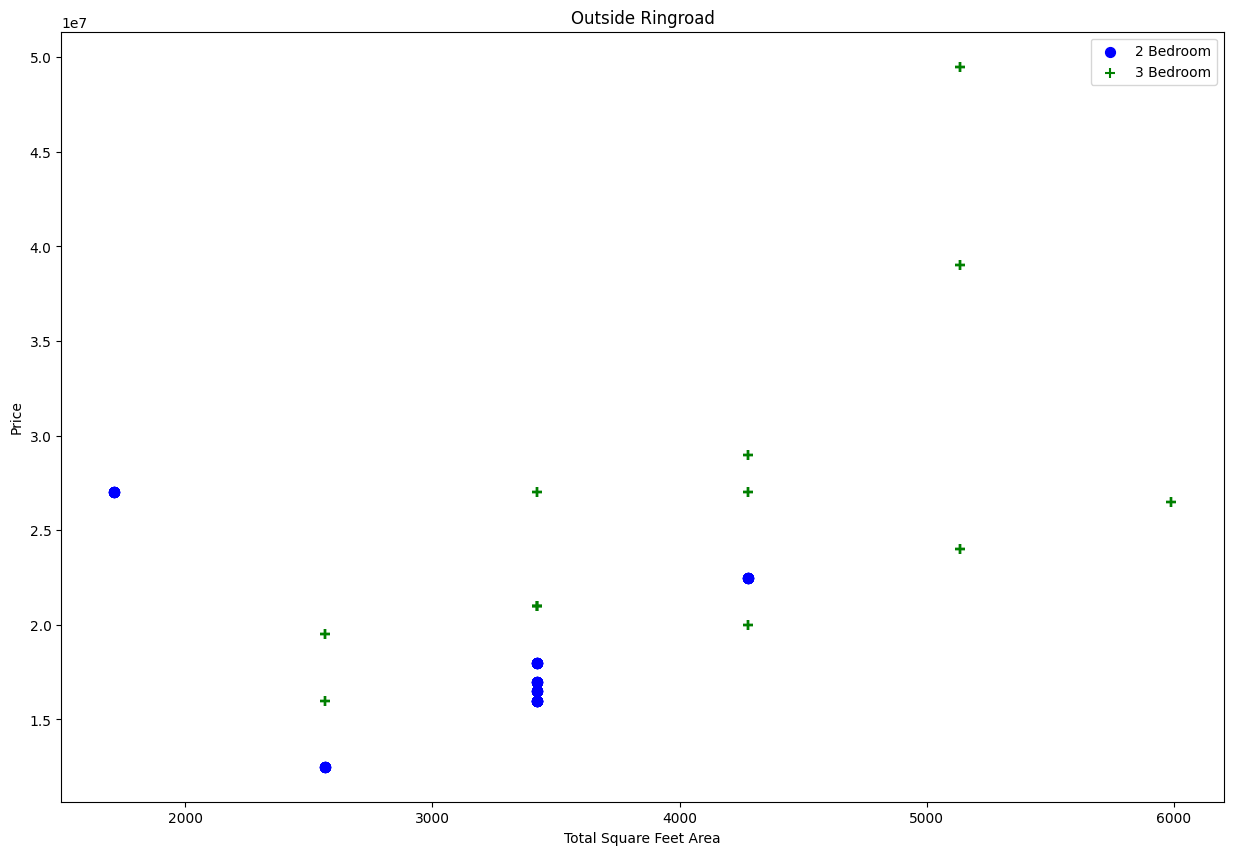

In [65]:
def plot_scatter_chart(df,location):
    bed_2 = df[(df['Ring Road']==location) & (df.Bedroom==2)]
    bed_3 = df[(df['Ring Road']==location) & (df.Bedroom==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bed_2['Buildup(Sqr.Ft.)'],bed_2.Price,color='blue',label='2 Bedroom', s=50)
    plt.scatter(bed_3['Buildup(Sqr.Ft.)'],bed_3.Price,marker='+', color='green',label='3 Bedroom', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df,"Outside Ringroad")

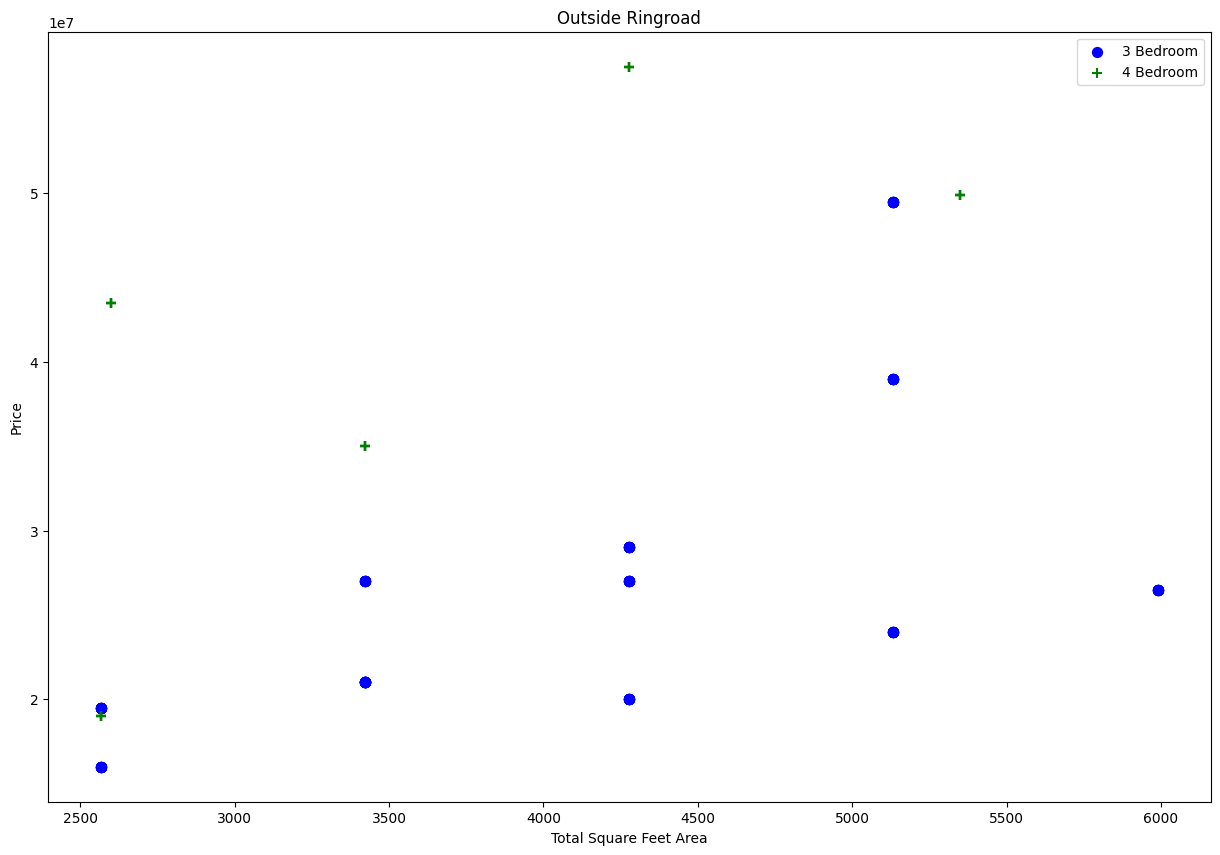

In [66]:
def plot_scatter_chart(df,location):
    bed_3 = df[(df['Ring Road']==location) & (df.Bedroom==3)]
    bed_4 = df[(df['Ring Road']==location) & (df.Bedroom==4)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bed_3['Buildup(Sqr.Ft.)'],bed_3.Price,color='blue',label='3 Bedroom', s=50)
    plt.scatter(bed_4['Buildup(Sqr.Ft.)'],bed_4.Price,marker='+', color='green',label='4 Bedroom', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df,"Outside Ringroad")

In [67]:
def remove_bed_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('Ring Road'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('Bedroom'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('Bedroom'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df = remove_bed_outliers(df)
df.shape

(716, 17)

Text(0, 0.5, 'Count')

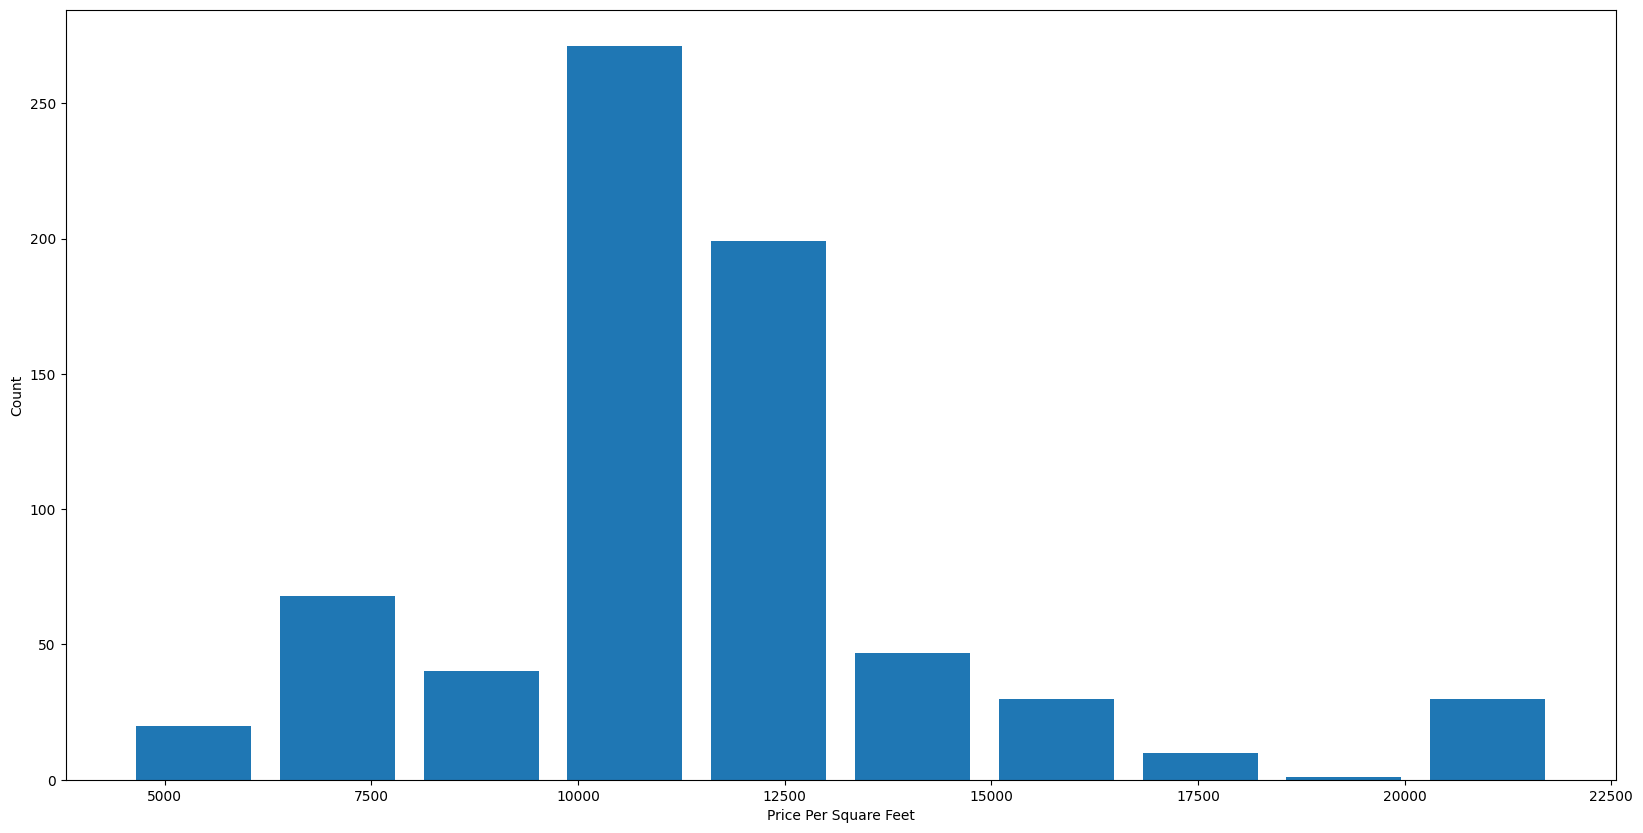

In [68]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [69]:
df.Bathroom.unique()

array([2., 3., 4., 1., 5., 7., 6.])

ad_id	Type	Title	location	Price	Land_Size	Buildup(Sqr.Ft.)	Floor	Living_Room	Bedroom	Bathroom	Kitchen	Road_Type	Road_Size	Land_Size_Sqft	Ring Road	price_per_sqf

In [70]:
columns_to_drop = ['ad_id', 'Title', 'location', 'Floor', 'Living_Room', 'Kitchen', 'Road_Type', 'Road_Size', 'Type']
df1 = df.drop(columns=columns_to_drop, axis=1)
df1.head()

,Price,Land_Size,Buildup(Sqr.Ft.),Bedroom,Bathroom,Land_Size_Sqft,Ring Road,price_per_sqft
3,20000000.0,3.0,2566.875,9.0,2.0,1026.75,Inside Ringroad,7791.575359
7,20000000.0,3.0,2566.875,9.0,2.0,1026.75,Inside Ringroad,7791.575359
10,20000000.0,3.0,2566.875,9.0,2.0,1026.75,Inside Ringroad,7791.575359
13,20000000.0,3.0,2566.875,9.0,2.0,1026.75,Inside Ringroad,7791.575359
16,20000000.0,3.0,2566.875,9.0,2.0,1026.75,Inside Ringroad,7791.575359


## Model Building

In [71]:
dummies = pd.get_dummies(df1['Ring Road'])
dummies.head()

,Inside Ringroad,Outside Ringroad
3,True,False
7,True,False
10,True,False
13,True,False
16,True,False


In [72]:
df2 = pd.concat([df1, dummies], axis='columns')
df2.head()

,Price,Land_Size,Buildup(Sqr.Ft.),Bedroom,Bathroom,Land_Size_Sqft,Ring Road,price_per_sqft,Inside Ringroad,Outside Ringroad
3,20000000.0,3.0,2566.875,9.0,2.0,1026.75,Inside Ringroad,7791.575359,True,False
7,20000000.0,3.0,2566.875,9.0,2.0,1026.75,Inside Ringroad,7791.575359,True,False
10,20000000.0,3.0,2566.875,9.0,2.0,1026.75,Inside Ringroad,7791.575359,True,False
13,20000000.0,3.0,2566.875,9.0,2.0,1026.75,Inside Ringroad,7791.575359,True,False
16,20000000.0,3.0,2566.875,9.0,2.0,1026.75,Inside Ringroad,7791.575359,True,False


In [73]:
X = df2.drop(columns=['Price', 'price_per_sqft', 'Ring Road'], axis=1)
X.head()

,Land_Size,Buildup(Sqr.Ft.),Bedroom,Bathroom,Land_Size_Sqft,Inside Ringroad,Outside Ringroad
3,3.0,2566.875,9.0,2.0,1026.75,True,False
7,3.0,2566.875,9.0,2.0,1026.75,True,False
10,3.0,2566.875,9.0,2.0,1026.75,True,False
13,3.0,2566.875,9.0,2.0,1026.75,True,False
16,3.0,2566.875,9.0,2.0,1026.75,True,False


In [74]:
y = df2.Price
y.head()

3     20000000.0
7     20000000.0
10    20000000.0
13    20000000.0
16    20000000.0
Name: Price, dtype: float64

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [76]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.29447844570970305

In [77]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.36348992, 0.42516247, 0.41353456, 0.33540682, 0.28378149])

In [78]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                # 'normalize': [True, False]  # Remove this line
                'fit_intercept': [True, False],  # Optionally tune fit_intercept
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],  # Updated criterion names
                'splitter': ['best', 'random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])


find_best_model_using_gridsearchcv(X, y)


/Users/paras/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.578e+16, tolerance: 5.920e+12
  model = cd_fast.enet_coordinate_descent(
/Users/paras/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.568e+16, tolerance: 5.920e+12
  model = cd_fast.enet_coordinate_descent(
/Users/paras/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.45

,model,best_score,best_params
0,linear_regression,0.364275,{'fit_intercept': True}
1,lasso,0.364275,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.945809,"{'criterion': 'squared_error', 'splitter': 'be..."


In [79]:
def predict_price(location, sqft, bath, bhk, model):
    # Find the index of the location column
    loc_index = np.where(X.columns == location)[0][0]

    # Initialize an input array with zeros
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    # Use the decision tree model to make a prediction
    return model.predict([x])[0]


In [80]:
decision_tree_model = DecisionTreeRegressor(criterion='squared_error', splitter='best')
decision_tree_model.fit(X_train, y_train)



DecisionTreeRegressor()

In [81]:
predict_price('Inside Ringroad', 2200, 4, 4, decision_tree_model)

/Users/paras/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


39000000.0

In [82]:
predict_price('Inside Ringroad', 2200, 4, 4, lr_clf)

/Users/paras/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


11899721.196643842

In [83]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# Make predictions on the test set
y_pred = decision_tree_model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)

# Print the results
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

R-squared: 0.893028771034903
Mean Absolute Error: 1344640.8553202031
Mean Squared Error: 10749848940981.02
Root Mean Squared Error: 3278696.225785643


In [84]:
predict_price('Outside Ringroad', 3200, 5, 4, decision_tree_model)

/Users/paras/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


39000000.0

In [85]:
import pickle
with open ('housing_price_prediction', 'wb') as f:
    pickle.dump(decision_tree_model, f)

In [86]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))